In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    # Step 1: Read and parse the file
    # file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/pcgrad_1e-3_1e-4_1/train_paligemma_domainnet-real_20240909_130251/slurm-948622.out'  # Replace with your file path
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Variables to store parsed data
    data = {}
    current_t = None

    # Step 2: Extract t, j, loss_strength, and reg_strength
    for i, line in enumerate(lines):
        t_match = re.search(r'==================== t ==================== (\d+)', line)
        
        if t_match:
            current_t = int(t_match.group(1))
            if current_t not in data:
                data[current_t] = {'j': [], 'loss_strength': [], 'reg_strength': []}

            j_match = re.search(r'j:  (\d+)', lines[i+1])
            j = int(j_match.group(1))
            data[current_t]['j'].append(j)

            loss_match = re.search(r'loss_strength:  tensor\(([\d.e-]+)', lines[i+2])
            loss_strength = float(loss_match.group(1))
            data[current_t]['loss_strength'].append(loss_strength)

            reg_match = re.search(r'reg_strength:  tensor\(([\d.e-]+)', lines[i+3])
            reg_strength = float(reg_match.group(1))
            data[current_t]['reg_strength'].append(reg_strength)

    # print(data)
    return data

# Step 3: Plot the data
def plot_for_t(t, data):
    j_values = data[t]['j']
    loss_values = data[t]['loss_strength']
    reg_values = data[t]['reg_strength']
    
    plt.figure(figsize=(10, 6))

    print(j_values)
    print(loss_values)
    
    plt.plot(j_values, loss_values, label='Loss Strength', marker='o')
    plt.plot(j_values, reg_values, label='Reg Strength', marker='x')
    
    plt.title(f'Plot for t = {t}')
    plt.xlabel('j')
    plt.ylabel('Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
# Define the plot_for_j function
def plot_for_j(j_value, data):
    t_values = []
    loss_values = []
    reg_values = []
    
    # Collect data for the given j value across different t's
    for t in data:
        if j_value in data[t]['j']:
            index = data[t]['j'].index(j_value)  # Get the index of j in the list for t
            t_values.append(t)
            loss_values.append(data[t]['loss_strength'][index])
            reg_values.append(data[t]['reg_strength'][index])
    
    if t_values:
        plt.figure(figsize=(10, 6))
        
        plt.plot(t_values, loss_values, label='Loss Strength', marker='o')
        plt.plot(t_values, reg_values, label='Reg Strength', marker='x')
        
        plt.title(f'Plot for j = {j_value}')
        plt.xlabel('t')
        plt.ylabel('Strength')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for j = {j_value}")



In [3]:
# Define the plot_for_average_j function
def plot_for_average_j(data):
    t_values = []
    avg_loss_values = []
    avg_reg_values = []
    
    # Calculate the average loss_strength and reg_strength for each t
    for t in data:
        t_values.append(t)
        avg_loss = np.mean(data[t]['loss_strength'])
        avg_reg = np.mean(data[t]['reg_strength'])
        avg_loss_values.append(avg_loss)
        avg_reg_values.append(avg_reg)
    
    # Plot the average values
    plt.figure(figsize=(10, 6))
    
    plt.plot(t_values, avg_loss_values, label='Average Loss Strength', marker='o')
    plt.plot(t_values, avg_reg_values, label='Average Reg Strength', marker='x')
    
    plt.title('Plot of Average Loss and Reg Strength for All j')
    plt.xlabel('t')
    plt.ylabel('Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

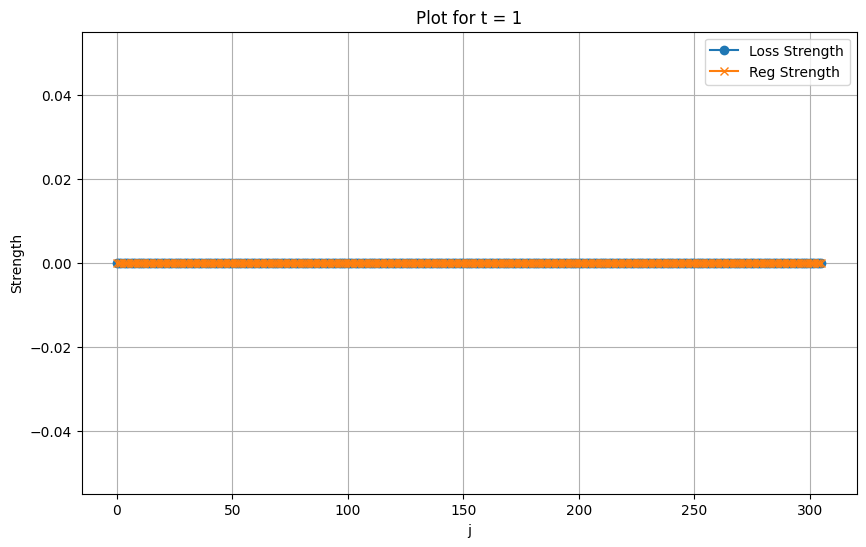

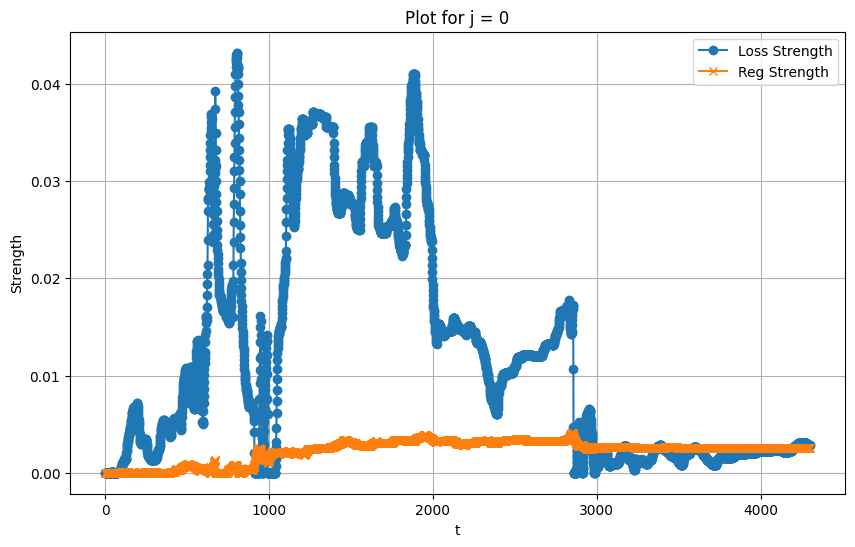

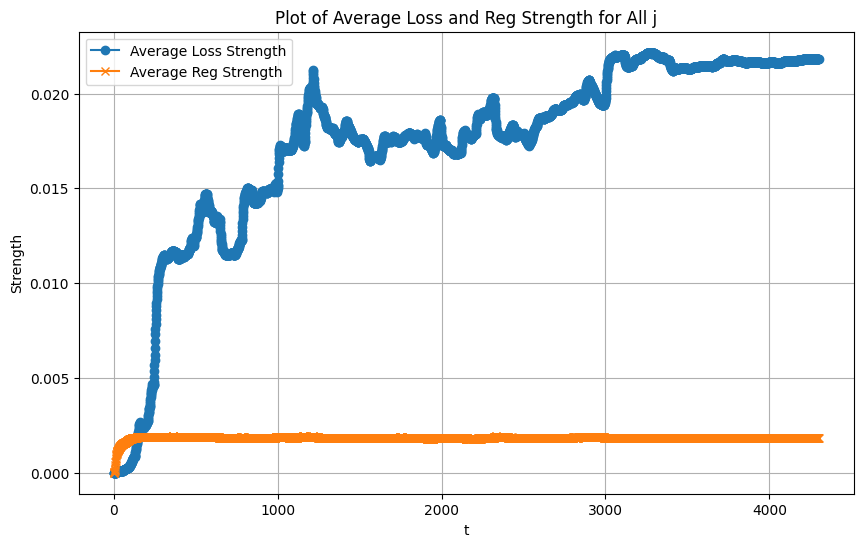

In [8]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/pcgrad_1e-3_1e-4_1/train_paligemma_domainnet-real_20240909_130251/slurm-948622.out'
data = read_data(file_path)
# Step 4: Plot for the first t = 1
if 1 in data:
    plot_for_t(1, data)
else:
    print("No data for t = 0")

# Example usage: Plot for j = 0
plot_for_j(0, data)

plot_for_average_j(data)

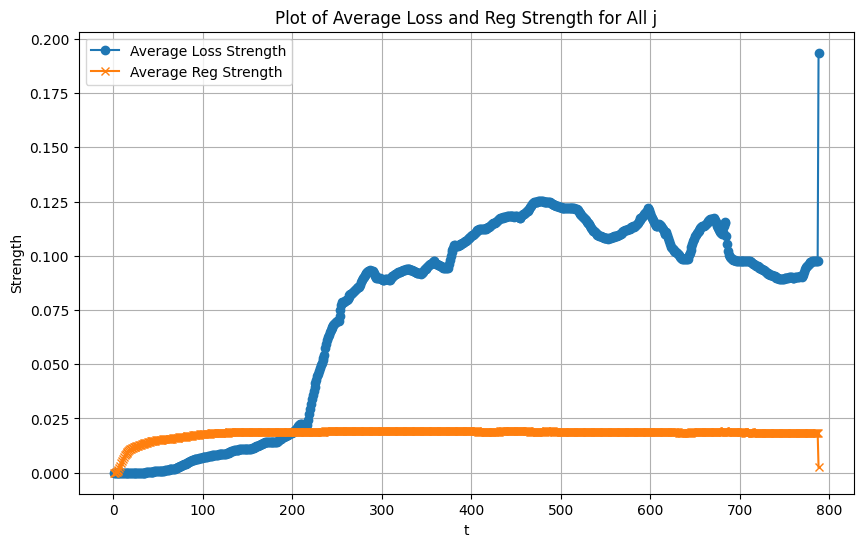

In [9]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/tpcgrad_1e-3_1e-4_mu1e-1/train_paligemma_domainnet-real_20240909_141728/slurm-948645.out'
data = read_data(file_path)
plot_for_average_j(data)

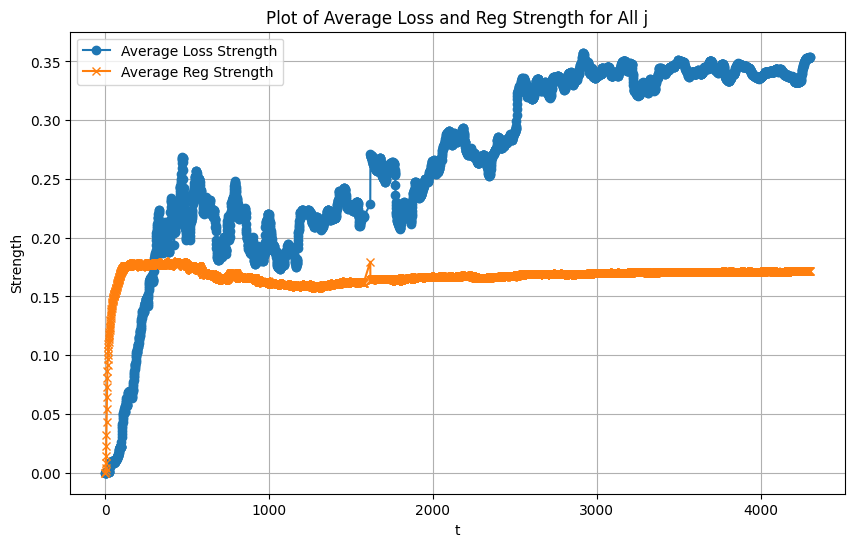

In [10]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu1/train_paligemma_domainnet-real_20240912_123629/slurm-949877.out'
data = read_data(file_path)
plot_for_average_j(data)

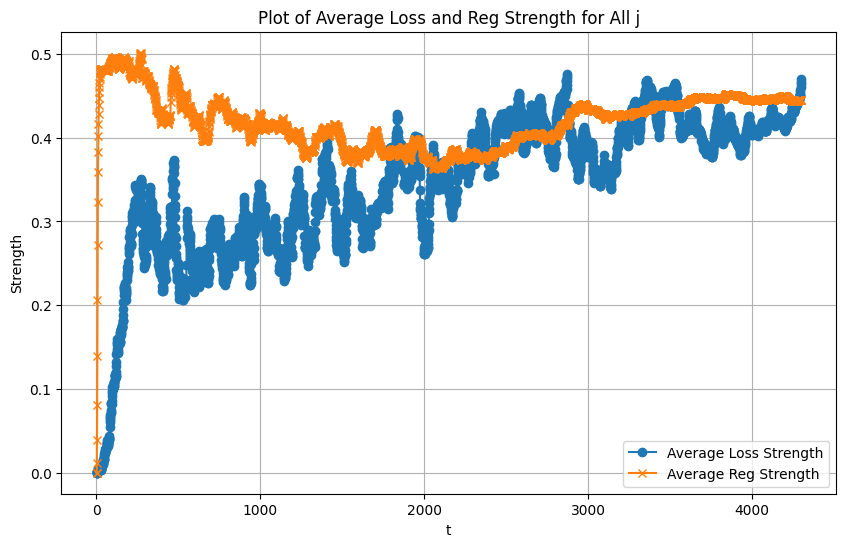

In [11]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu10/train_paligemma_domainnet-real_20240912_155739/slurm-949909.out'
data = read_data(file_path)
plot_for_average_j(data)

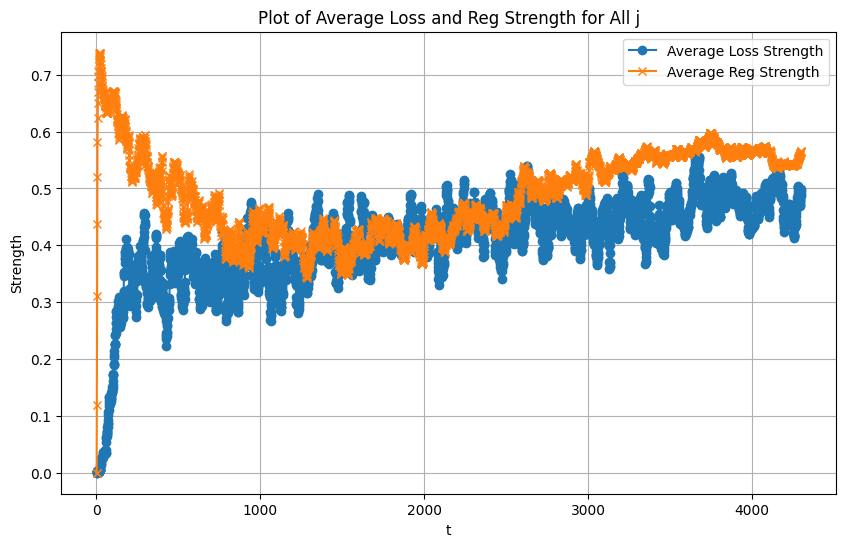

In [12]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu100/train_paligemma_domainnet-real_20240912_160446/slurm-949914.out'
data = read_data(file_path)
plot_for_average_j(data)

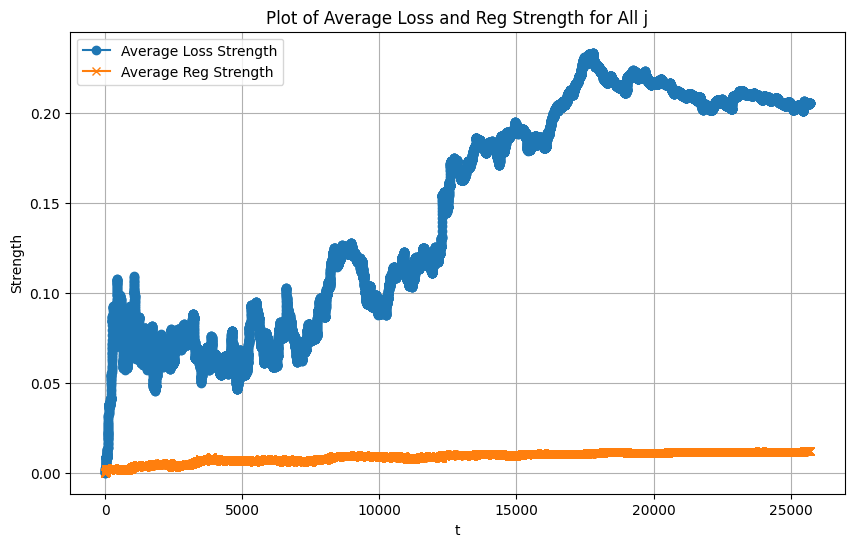

In [13]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu1e-1/train_paligemma_vqa_20240911_143630/slurm-949416.out'
data = read_data(file_path)
plot_for_average_j(data)

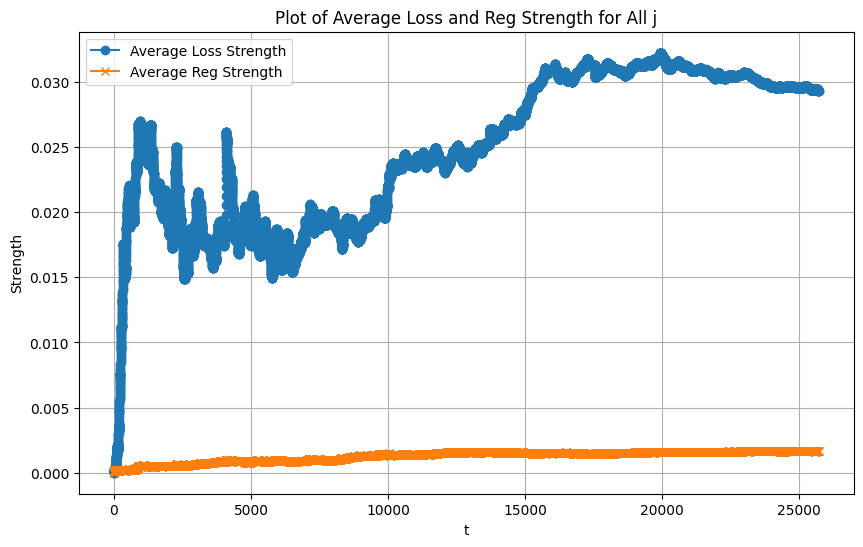

In [14]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/vqa/tpcgrad_1e-3_1e-4_mu1e-2/train_paligemma_vqa_20240910_111134/slurm-948897.out'
data = read_data(file_path)
plot_for_average_j(data)

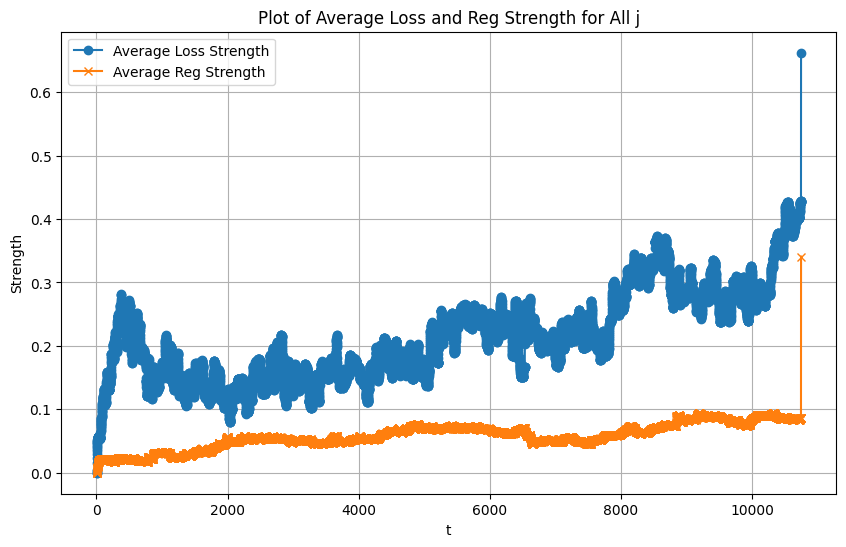

In [16]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu1/train_paligemma_vqa_20240912_133942/slurm-949885.out'
data = read_data(file_path)
plot_for_average_j(data)

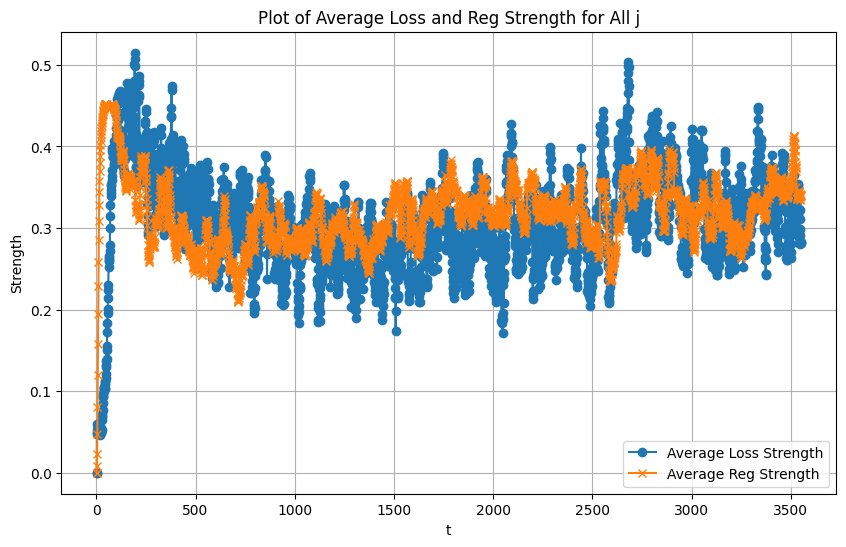

In [ ]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu100/train_paligemma_vqa_20240912_165024/slurm-949932.out'
data = read_data(file_path)
plot_for_average_j(data)

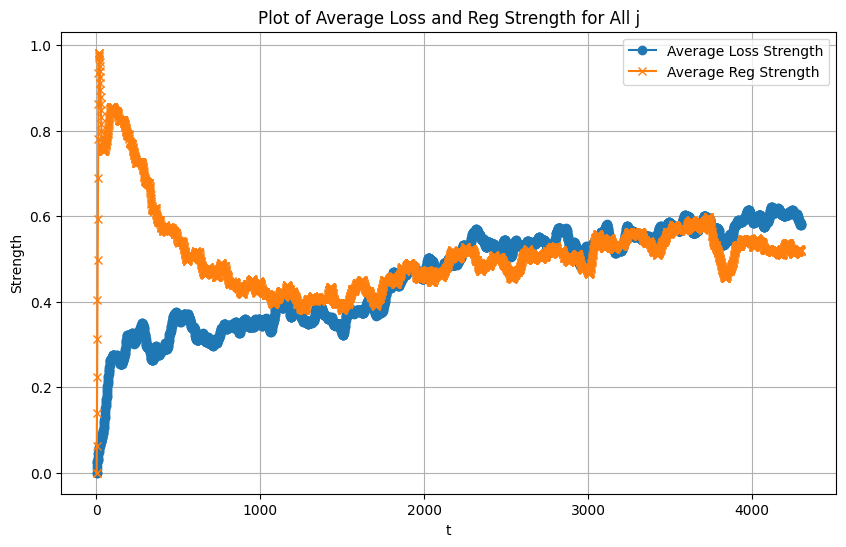

In [4]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_norm_1e-3_1e-4_mu1e-1/train_paligemma_domainnet-real_20240914_204221/slurm-951481.out'
data = read_data(file_path)
plot_for_average_j(data)

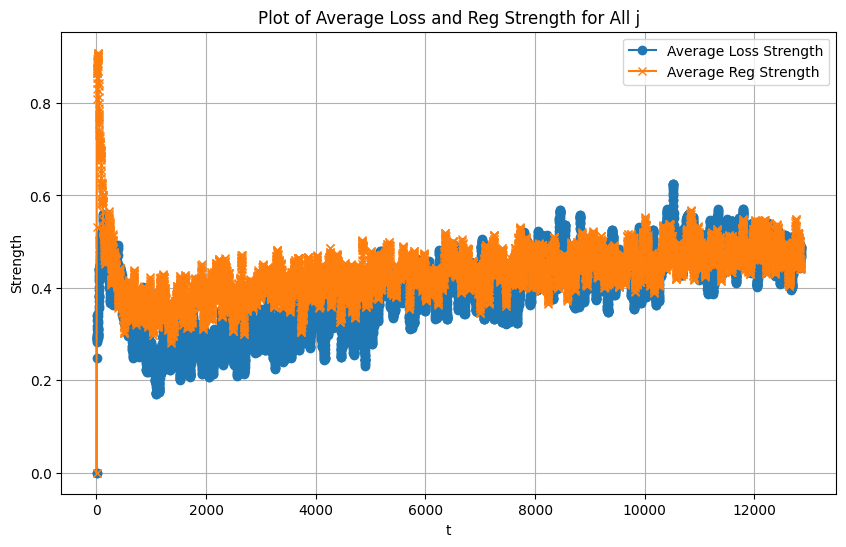

In [5]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_norm_1e-3_1e-4_mu1/train_paligemma_vqa_20240915_021333/slurm-951851.out'
data = read_data(file_path)
plot_for_average_j(data)